In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-finish-placement-prediction/train_V2.csv
/kaggle/input/pubg-finish-placement-prediction/test_V2.csv
/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
numeric_cols = list(data.columns)
numeric_cols.remove('Id')
numeric_cols.remove('groupId')
numeric_cols.remove('matchId')
numeric_cols.remove('matchType')
numeric_cols.remove('rideDistance')
numeric_cols.remove('winPlacePerc')
numeric_cols.remove('rankPoints')
numeric_cols.remove('killPoints')
numeric_cols.remove('winPoints')
numeric_cols.remove('matchDuration')
numeric_cols.remove('killPlace')
numeric_cols.remove('maxPlace')
numeric_cols.remove('numGroups')
numeric_cols.remove('vehicleDestroys')

numeric_cols

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'kills',
 'killStreaks',
 'longestKill',
 'revives',
 'roadKills',
 'swimDistance',
 'teamKills',
 'walkDistance',
 'weaponsAcquired']

#####################################################
######################    assists    ######################
#####################################################


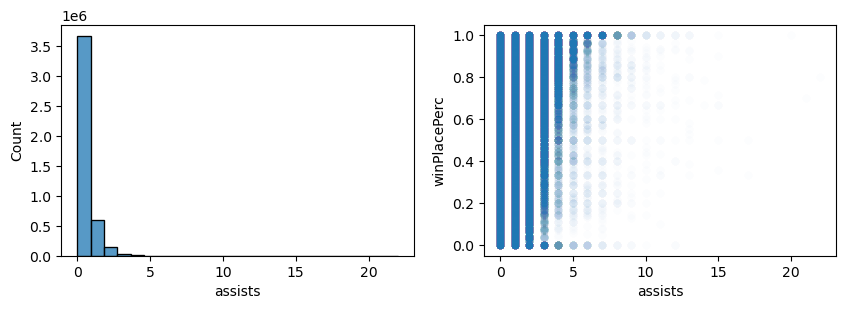

quantile 0.99 :  3.0


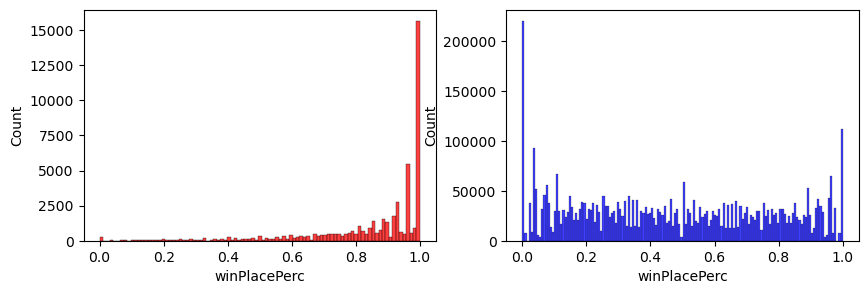

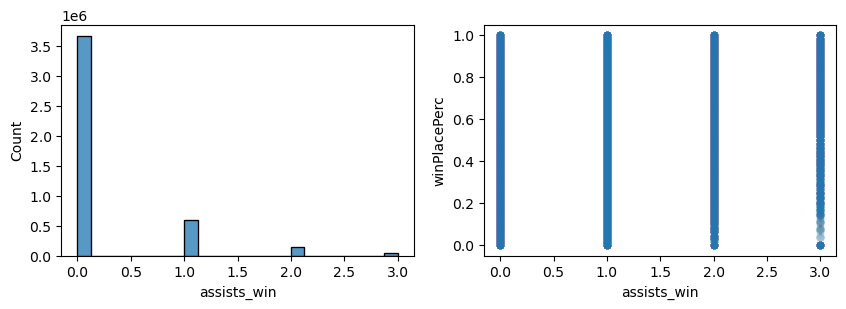

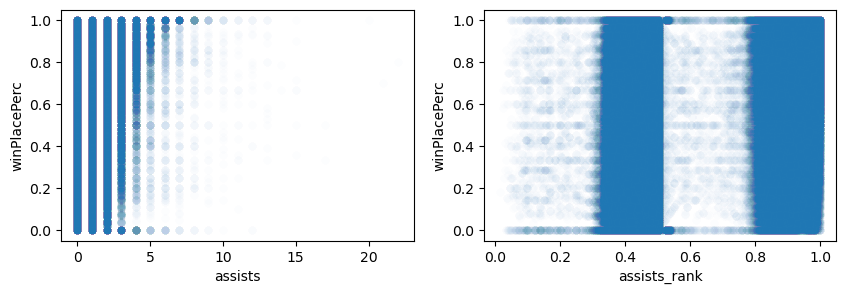

assists
               assists  winPlacePerc
assists       1.000000      0.299441
winPlacePerc  0.299441      1.000000
assists_win
              assists_win  winPlacePerc
assists_win      1.000000      0.307193
winPlacePerc     0.307193      1.000000
assists_rank
              assists_rank  winPlacePerc
assists_rank      1.000000      0.311175
winPlacePerc      0.311175      1.000000
#####################################################
######################    boosts    ######################
#####################################################


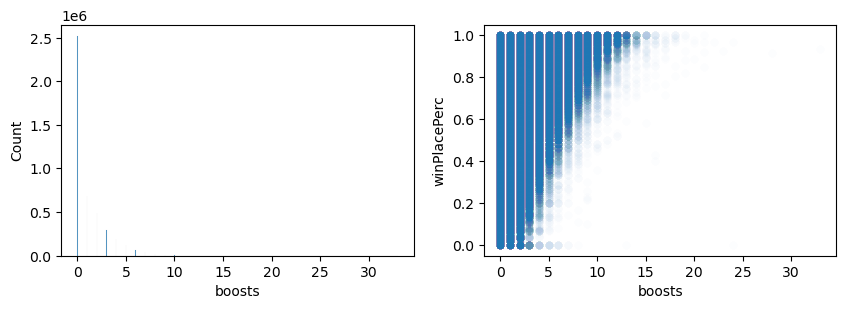

quantile 0.99 :  8.0


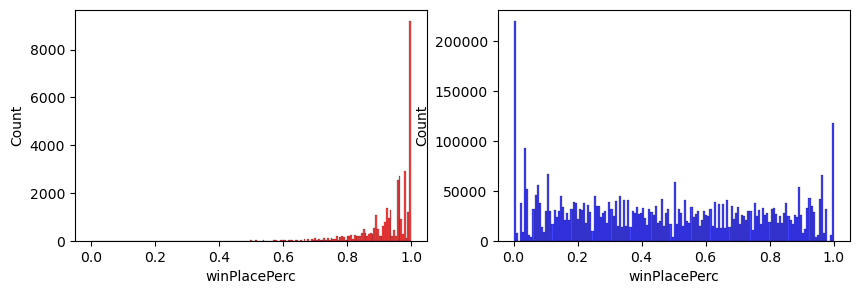

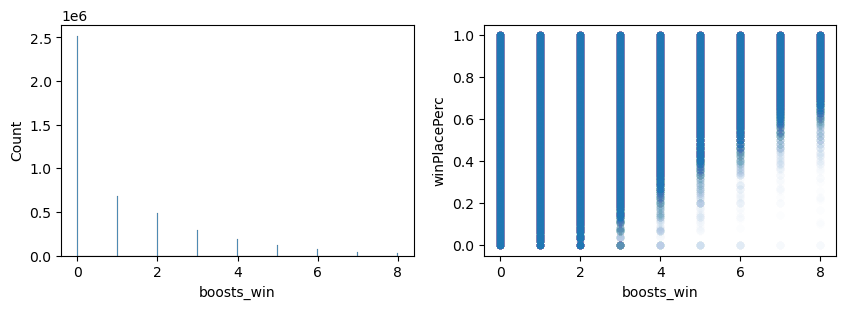

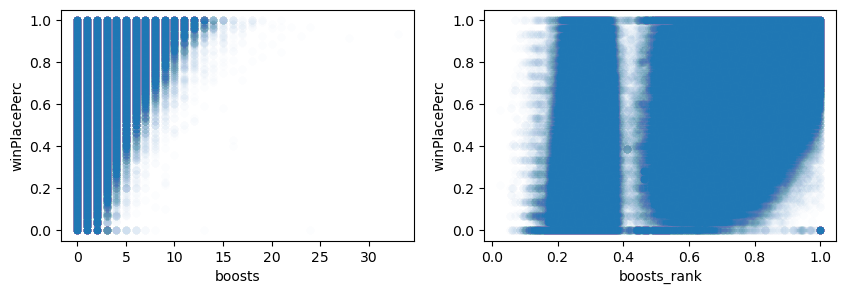

boosts
                boosts  winPlacePerc
boosts        1.000000      0.634234
winPlacePerc  0.634234      1.000000
boosts_win
              boosts_win  winPlacePerc
boosts_win      1.000000      0.639948
winPlacePerc    0.639948      1.000000
boosts_rank
              boosts_rank  winPlacePerc
boosts_rank      1.000000      0.691909
winPlacePerc     0.691909      1.000000
#####################################################
######################    damageDealt    ######################
#####################################################


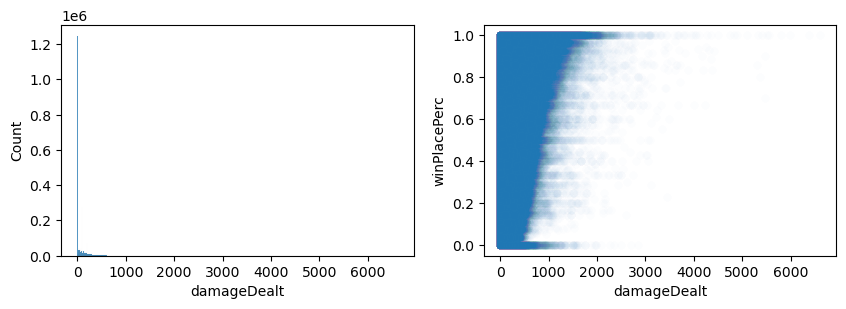

quantile 0.99 :  923.9


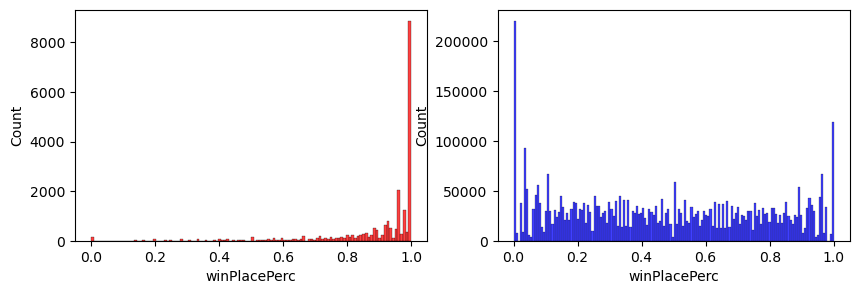

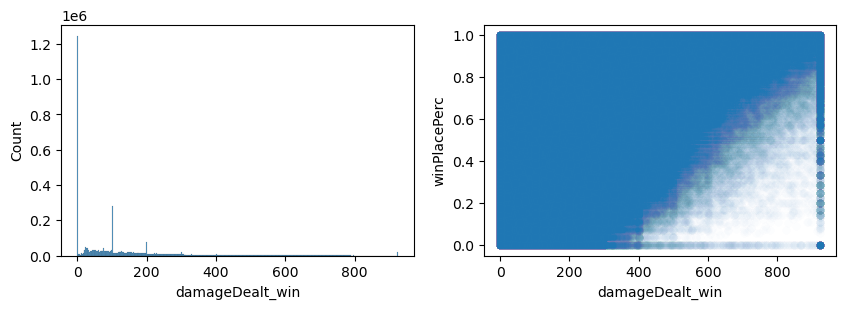

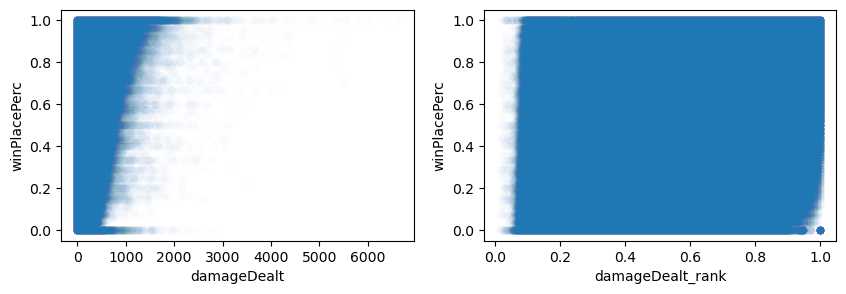

damageDealt
              damageDealt  winPlacePerc
damageDealt      1.000000      0.440507
winPlacePerc     0.440507      1.000000
damageDealt_win
                 damageDealt_win  winPlacePerc
damageDealt_win         1.000000      0.454319
winPlacePerc            0.454319      1.000000
damageDealt_rank
                  damageDealt_rank  winPlacePerc
damageDealt_rank          1.000000      0.448345
winPlacePerc              0.448345      1.000000
#####################################################
######################    DBNOs    ######################
#####################################################


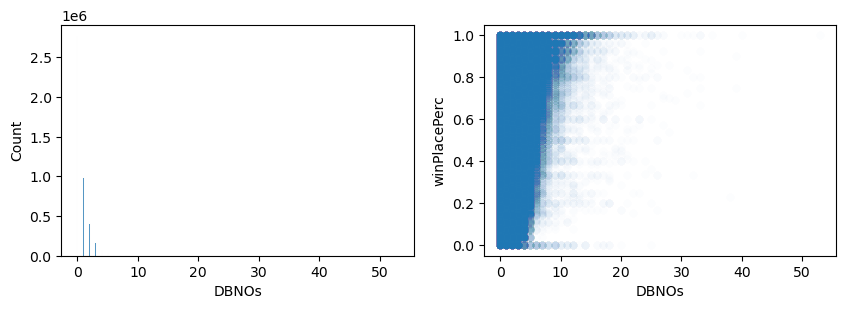

quantile 0.99 :  6.0


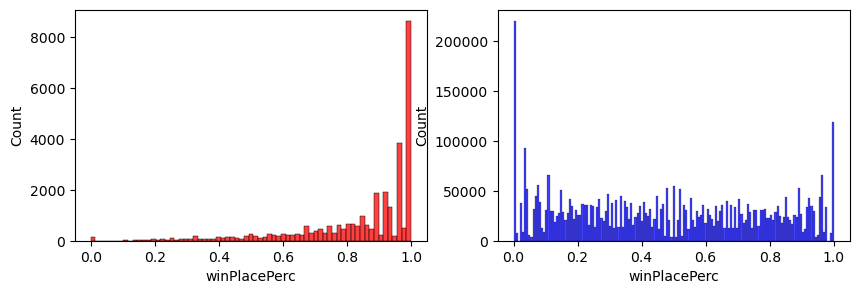

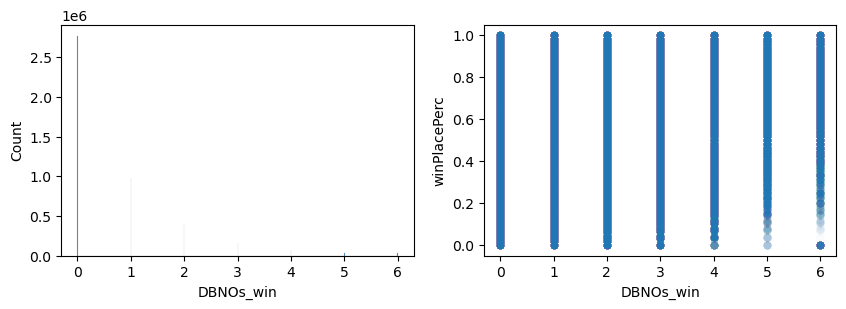

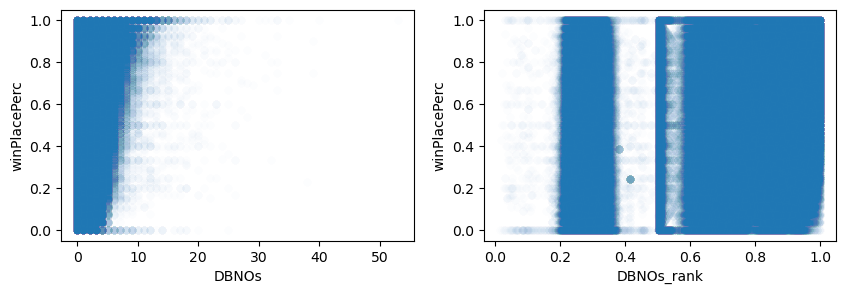

DBNOs
                DBNOs  winPlacePerc
DBNOs         1.00000       0.27997
winPlacePerc  0.27997       1.00000
DBNOs_win
              DBNOs_win  winPlacePerc
DBNOs_win      1.000000      0.286769
winPlacePerc   0.286769      1.000000
DBNOs_rank
              DBNOs_rank  winPlacePerc
DBNOs_rank      1.000000      0.290178
winPlacePerc    0.290178      1.000000
#####################################################
######################    headshotKills    ######################
#####################################################


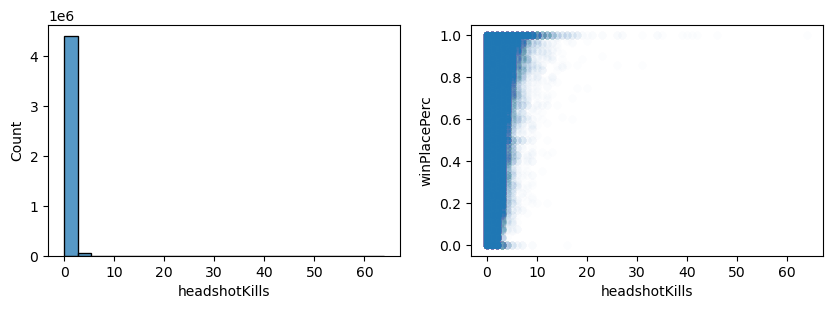

quantile 0.99 :  3.0


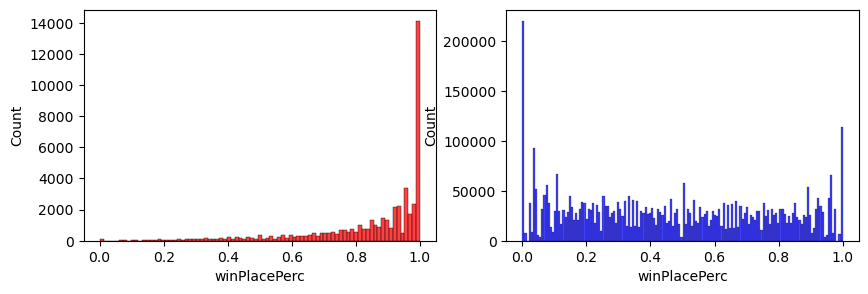

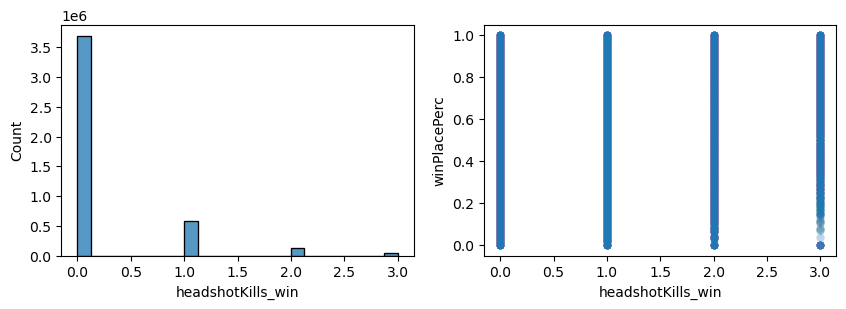

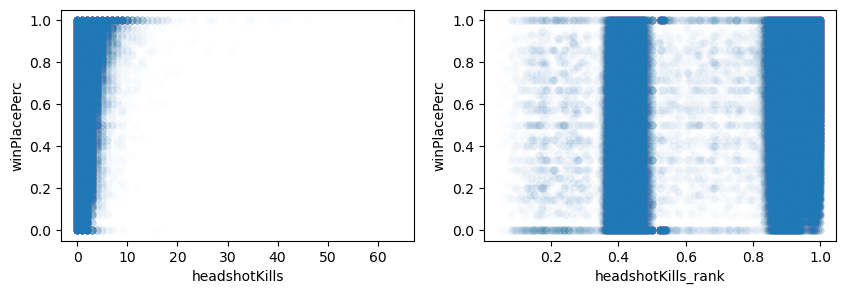

headshotKills
               headshotKills  winPlacePerc
headshotKills       1.000000      0.277722
winPlacePerc        0.277722      1.000000
headshotKills_win
                   headshotKills_win  winPlacePerc
headshotKills_win           1.000000      0.289514
winPlacePerc                0.289514      1.000000
headshotKills_rank
                    headshotKills_rank  winPlacePerc
headshotKills_rank            1.000000      0.283986
winPlacePerc                  0.283986      1.000000
#####################################################
######################    heals    ######################
#####################################################


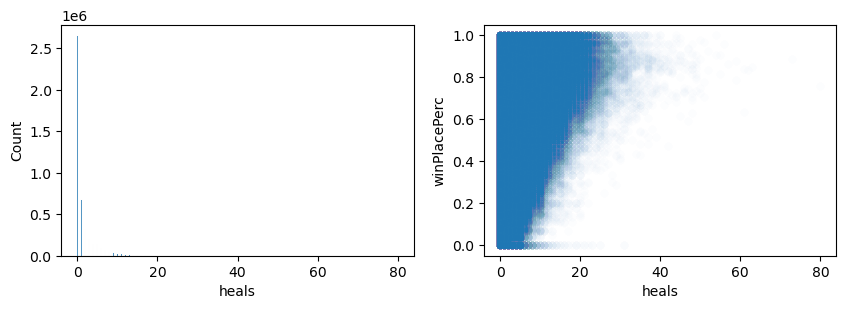

quantile 0.99 :  15.0


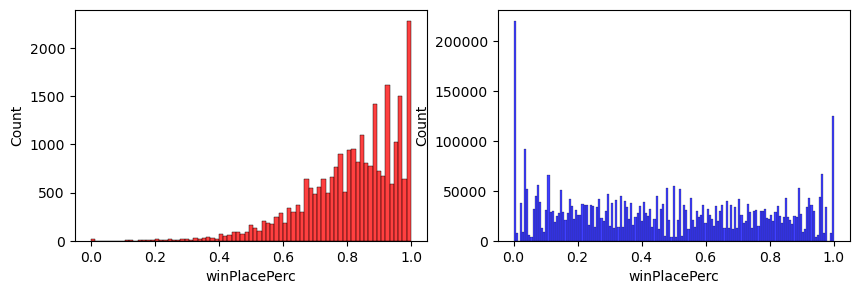

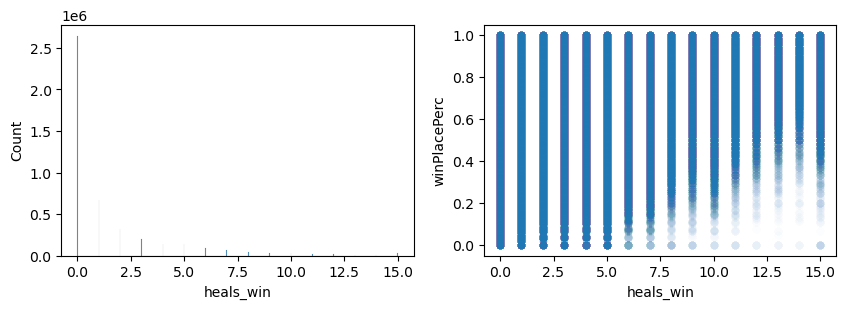

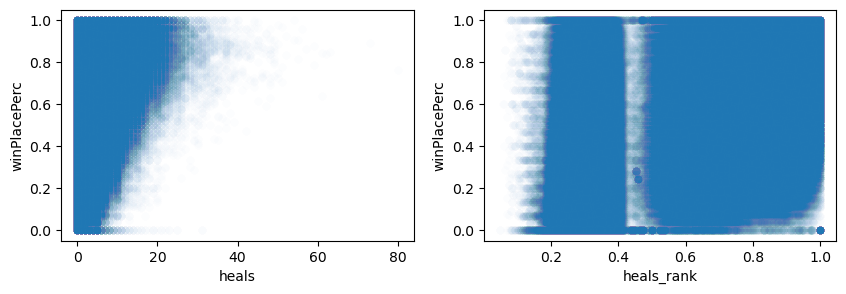

heals
                 heals  winPlacePerc
heals         1.000000      0.427857
winPlacePerc  0.427857      1.000000
heals_win
              heals_win  winPlacePerc
heals_win      1.000000      0.443221
winPlacePerc   0.443221      1.000000
heals_rank
              heals_rank  winPlacePerc
heals_rank      1.000000      0.574903
winPlacePerc    0.574903      1.000000
#####################################################
######################    kills    ######################
#####################################################


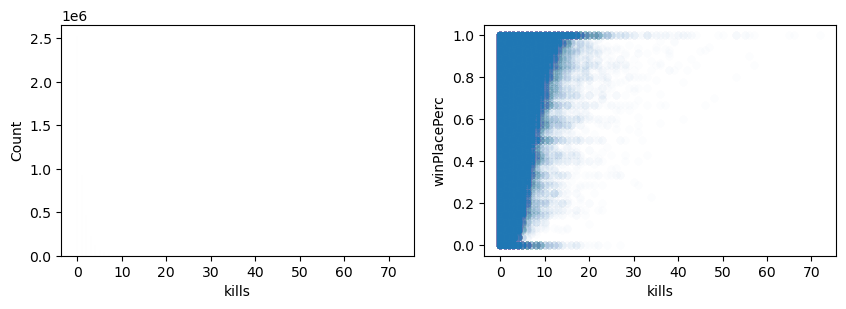

quantile 0.99 :  8.0


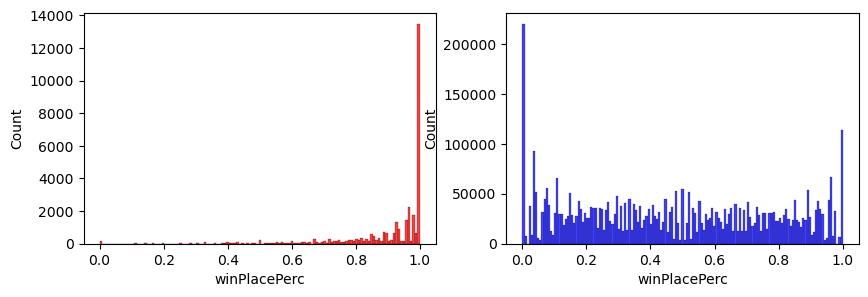

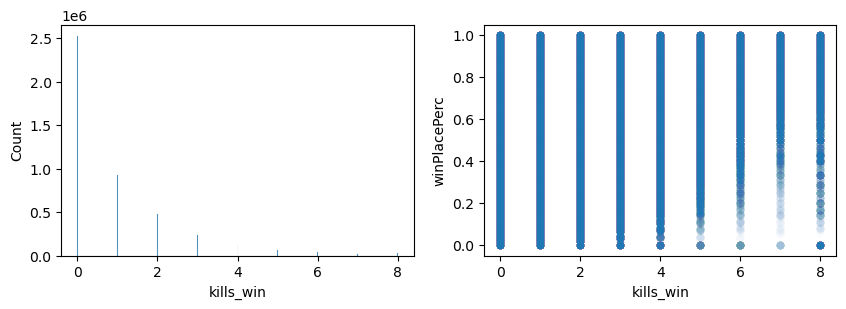

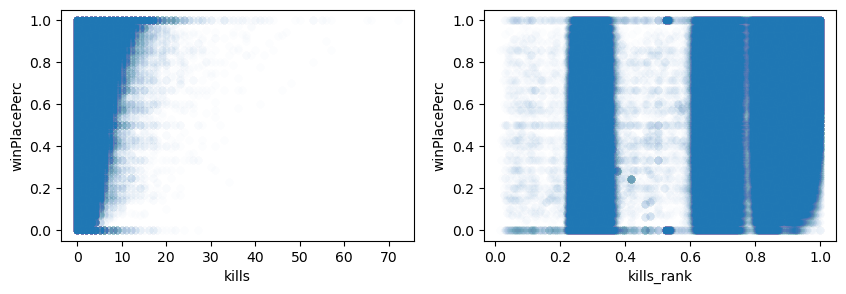

kills
                 kills  winPlacePerc
kills         1.000000      0.419916
winPlacePerc  0.419916      1.000000
kills_win
              kills_win  winPlacePerc
kills_win      1.000000      0.435553
winPlacePerc   0.435553      1.000000
kills_rank
              kills_rank  winPlacePerc
kills_rank      1.000000      0.432485
winPlacePerc    0.432485      1.000000
#####################################################
######################    killStreaks    ######################
#####################################################


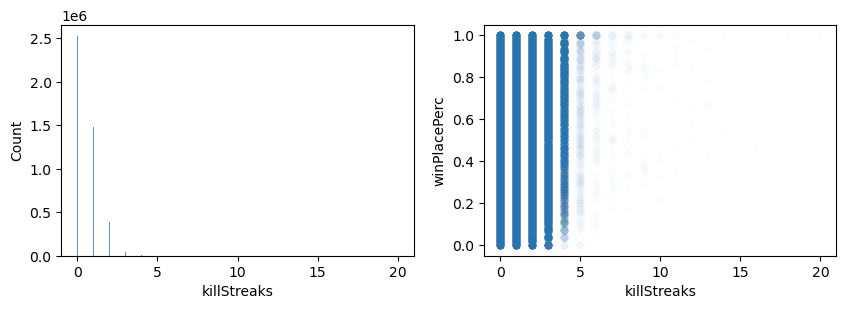

quantile 0.99 :  3.0


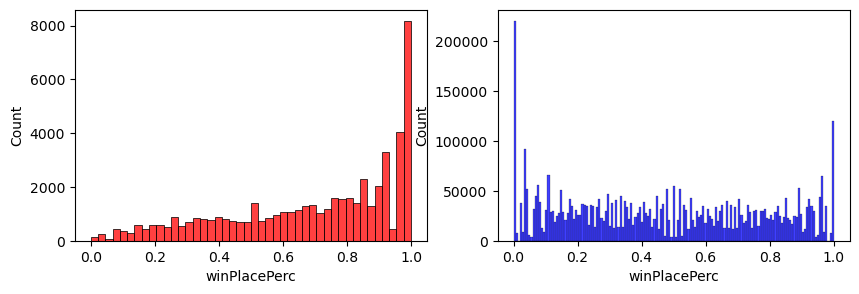

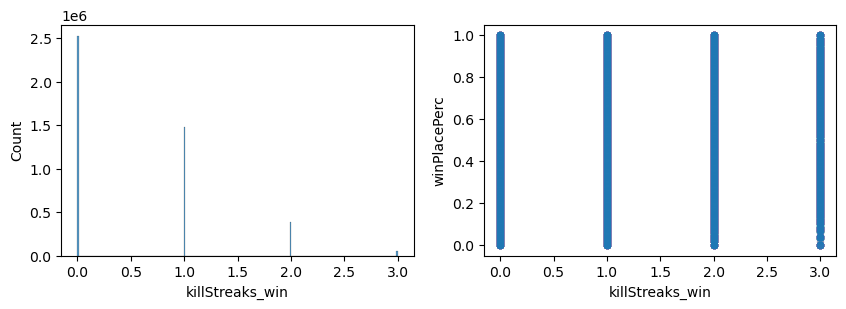

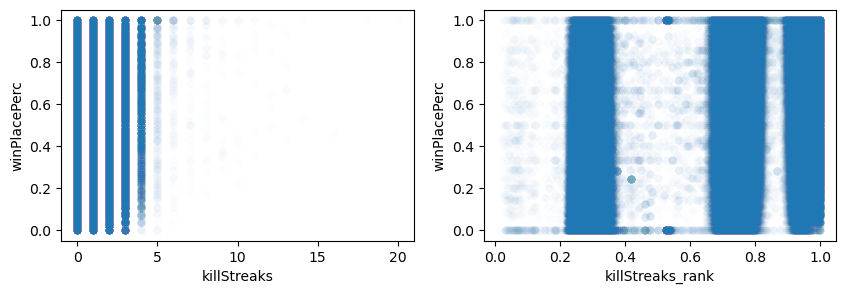

killStreaks
              killStreaks  winPlacePerc
killStreaks      1.000000      0.377566
winPlacePerc     0.377566      1.000000
killStreaks_win
                 killStreaks_win  winPlacePerc
killStreaks_win         1.000000      0.380158
winPlacePerc            0.380158      1.000000
killStreaks_rank
                  killStreaks_rank  winPlacePerc
killStreaks_rank          1.000000      0.393592
winPlacePerc              0.393592      1.000000
#####################################################
######################    longestKill    ######################
#####################################################


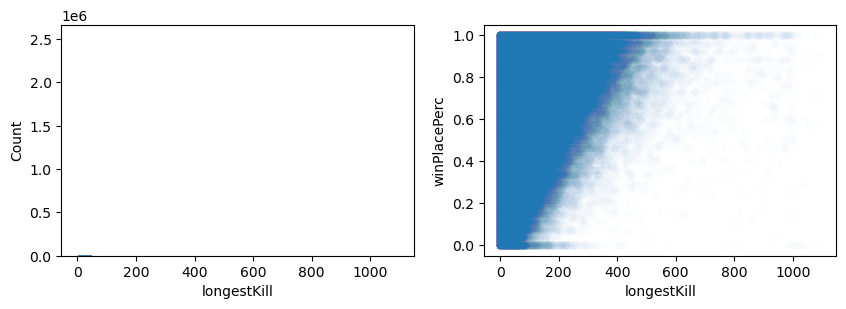

quantile 0.99 :  293.0


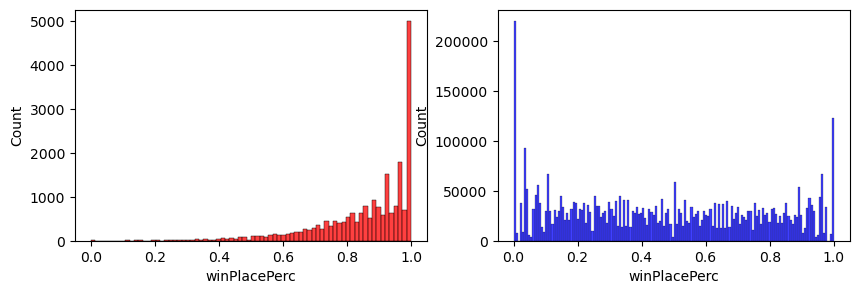

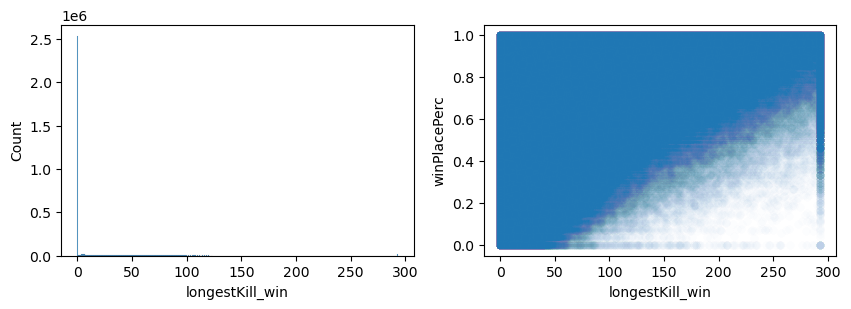

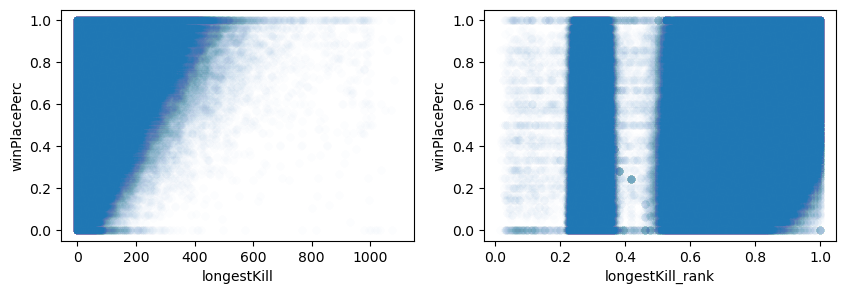

longestKill
              longestKill  winPlacePerc
longestKill      1.000000      0.410154
winPlacePerc     0.410154      1.000000
longestKill_win
                 longestKill_win  winPlacePerc
longestKill_win         1.000000      0.425761
winPlacePerc            0.425761      1.000000
longestKill_rank
                  longestKill_rank  winPlacePerc
longestKill_rank          1.000000      0.456943
winPlacePerc              0.456943      1.000000
#####################################################
######################    revives    ######################
#####################################################


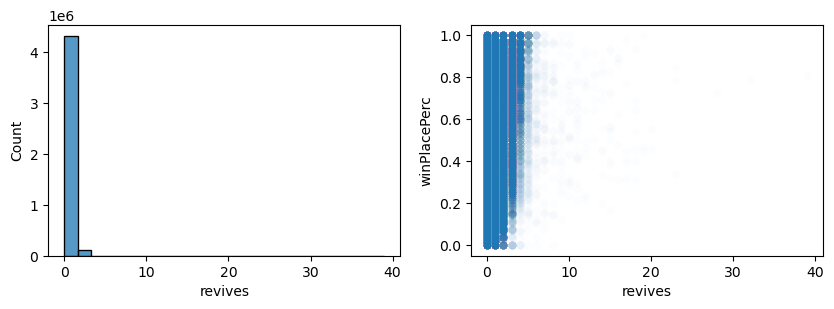

quantile 0.99 :  2.0


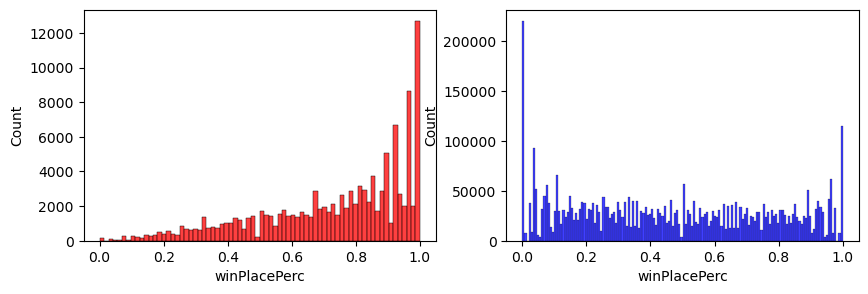

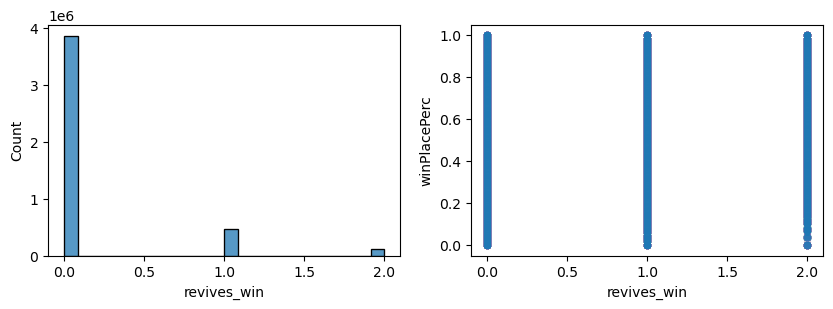

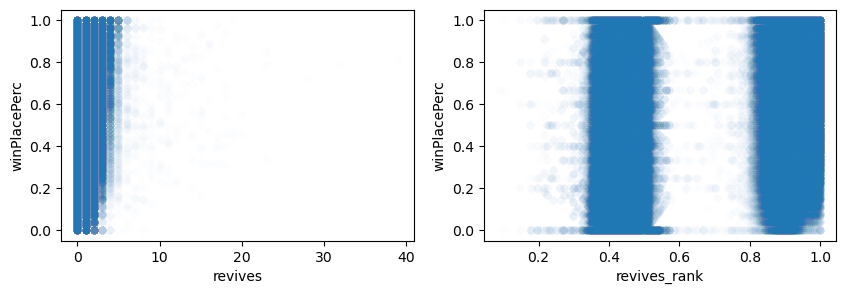

revives
               revives  winPlacePerc
revives       1.000000      0.240881
winPlacePerc  0.240881      1.000000
revives_win
              revives_win  winPlacePerc
revives_win      1.000000      0.250498
winPlacePerc     0.250498      1.000000
revives_rank
              revives_rank  winPlacePerc
revives_rank      1.000000      0.264132
winPlacePerc      0.264132      1.000000
#####################################################
######################    roadKills    ######################
#####################################################


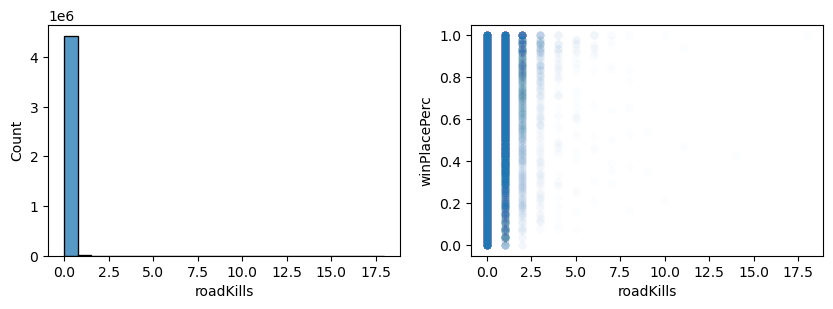

quantile 0.99 :  0.0


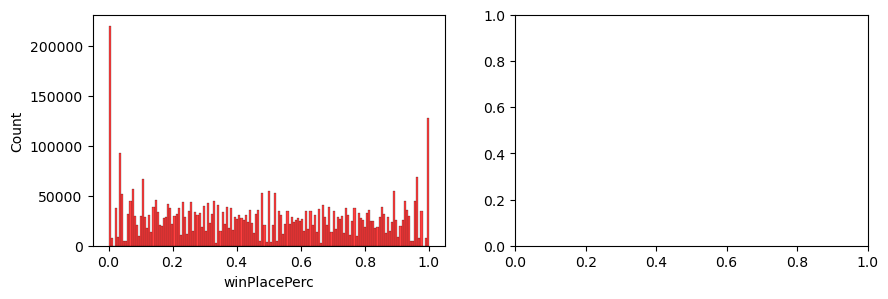

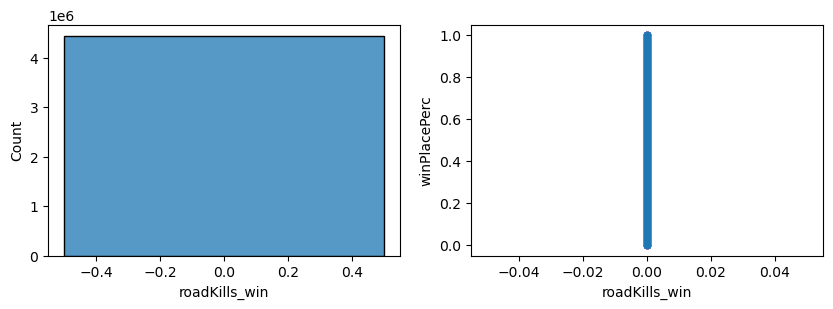

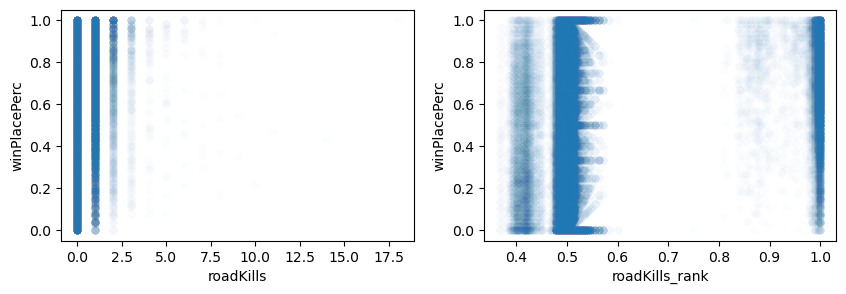

roadKills
              roadKills  winPlacePerc
roadKills      1.000000      0.034544
winPlacePerc   0.034544      1.000000
roadKills_win
               roadKills_win  winPlacePerc
roadKills_win            NaN           NaN
winPlacePerc             NaN           1.0
roadKills_rank
                roadKills_rank  winPlacePerc
roadKills_rank         1.00000       0.03795
winPlacePerc           0.03795       1.00000
#####################################################
######################    swimDistance    ######################
#####################################################


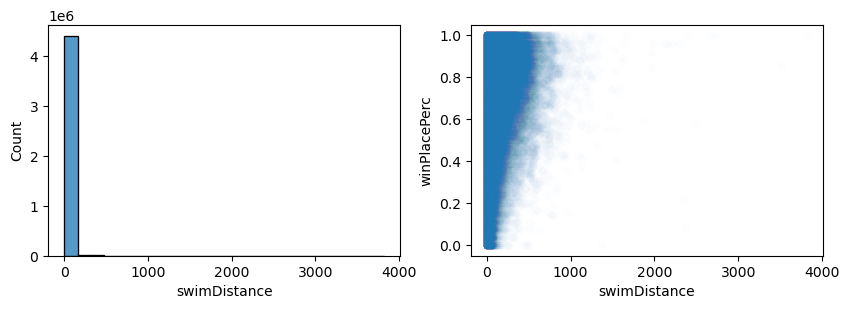

quantile 0.99 :  193.2


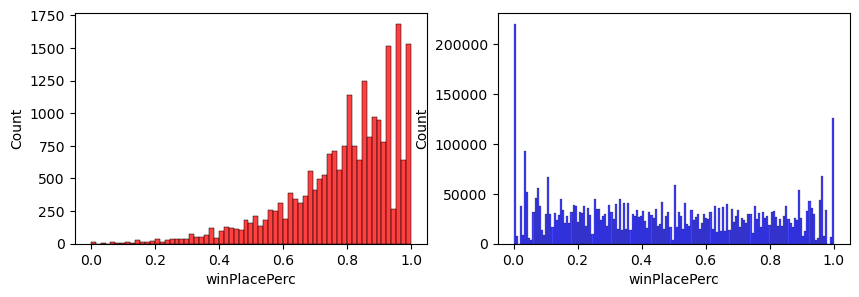

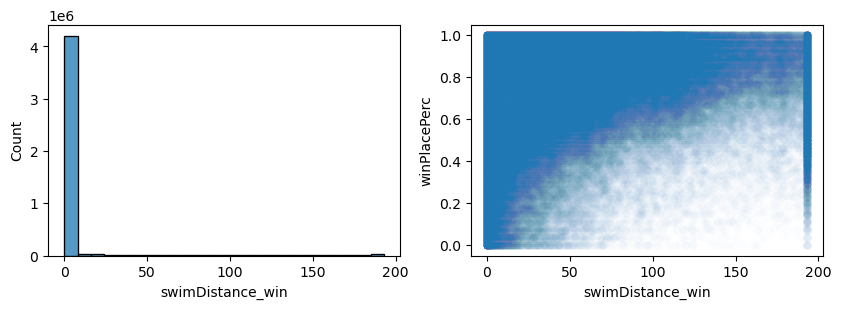

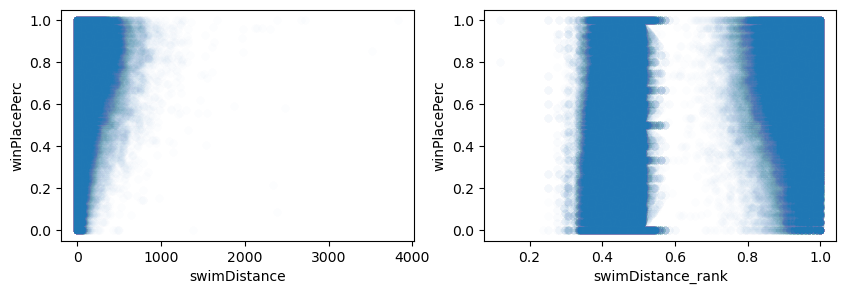

swimDistance
              swimDistance  winPlacePerc
swimDistance      1.000000      0.149607
winPlacePerc      0.149607      1.000000
swimDistance_win
                  swimDistance_win  winPlacePerc
swimDistance_win          1.000000      0.185131
winPlacePerc              0.185131      1.000000
swimDistance_rank
                   swimDistance_rank  winPlacePerc
swimDistance_rank           1.000000      0.241216
winPlacePerc                0.241216      1.000000
#####################################################
######################    teamKills    ######################
#####################################################


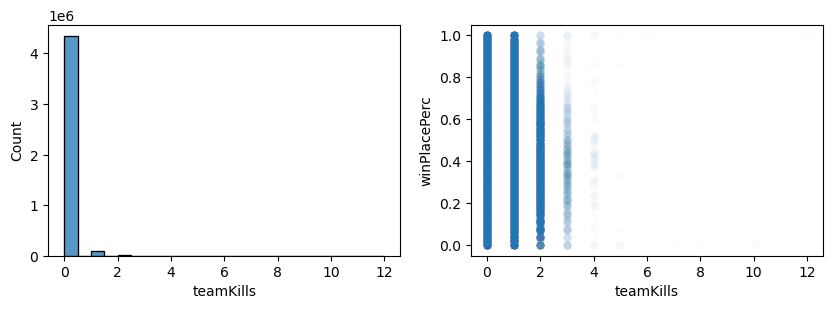

quantile 0.99 :  1.0


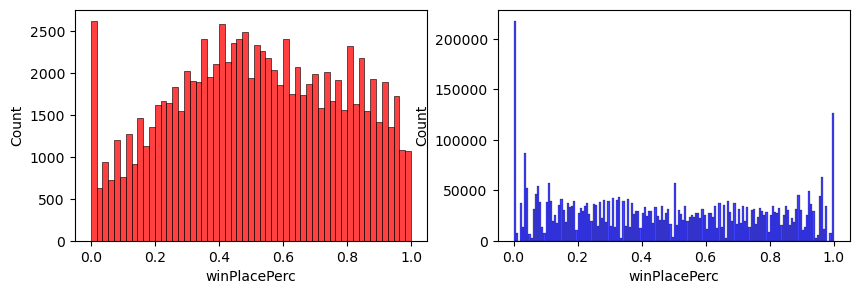

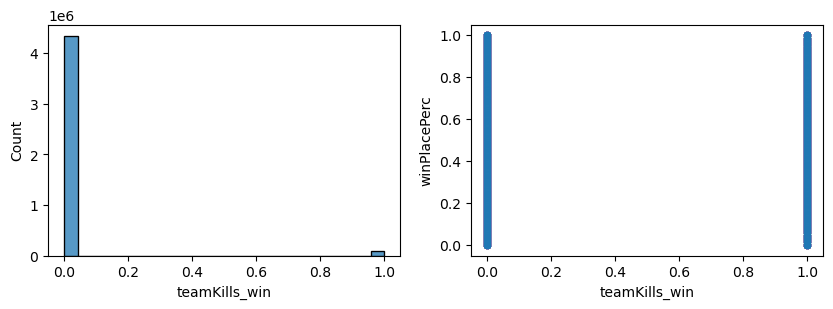

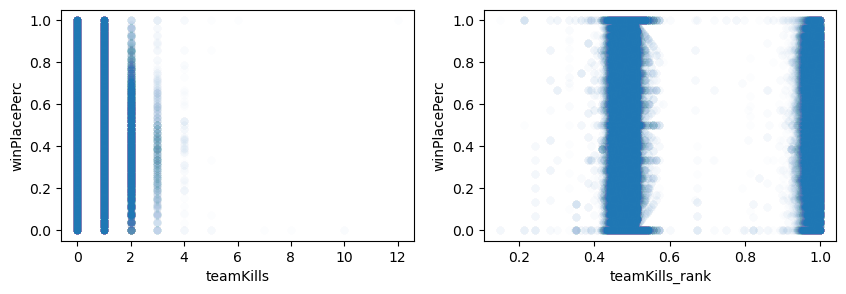

teamKills
              teamKills  winPlacePerc
teamKills      1.000000      0.015943
winPlacePerc   0.015943      1.000000
teamKills_win
               teamKills_win  winPlacePerc
teamKills_win       1.000000      0.021877
winPlacePerc        0.021877      1.000000
teamKills_rank
                teamKills_rank  winPlacePerc
teamKills_rank        1.000000      0.023227
winPlacePerc          0.023227      1.000000
#####################################################
######################    walkDistance    ######################
#####################################################


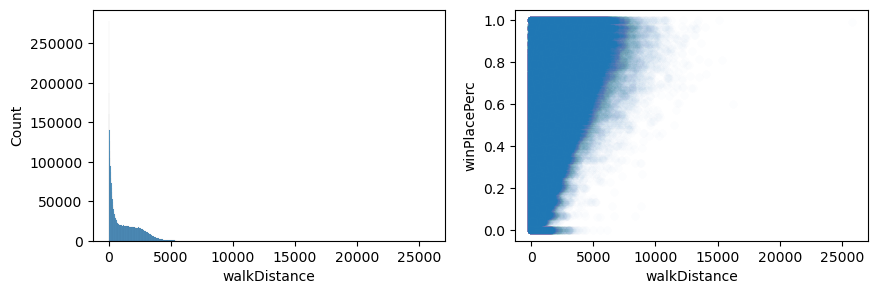

quantile 0.99 :  4834.0


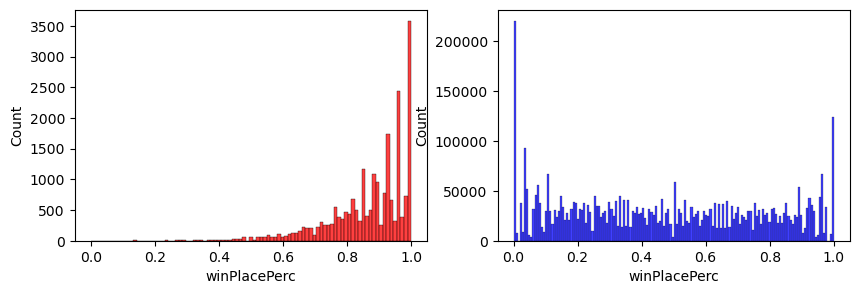

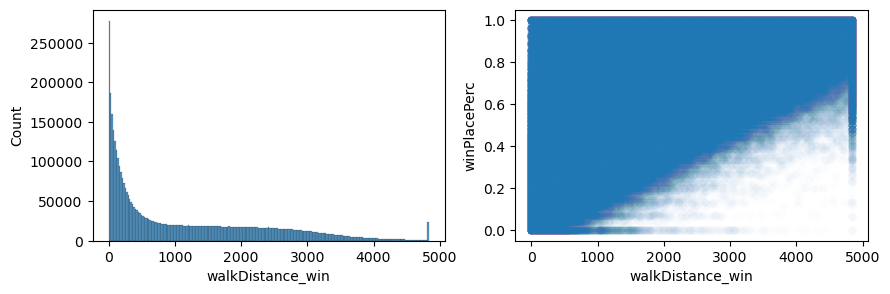

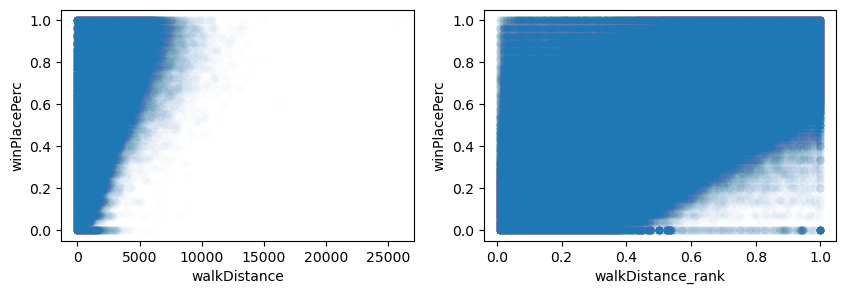

walkDistance
              walkDistance  winPlacePerc
walkDistance      1.000000      0.810888
winPlacePerc      0.810888      1.000000
walkDistance_win
                  walkDistance_win  winPlacePerc
walkDistance_win          1.000000      0.818724
winPlacePerc              0.818724      1.000000
walkDistance_rank
                   walkDistance_rank  winPlacePerc
walkDistance_rank           1.000000      0.886598
winPlacePerc                0.886598      1.000000
#####################################################
######################    weaponsAcquired    ######################
#####################################################


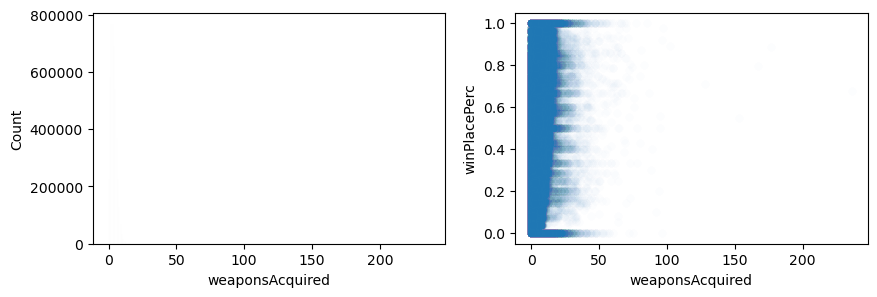

quantile 0.99 :  12.0


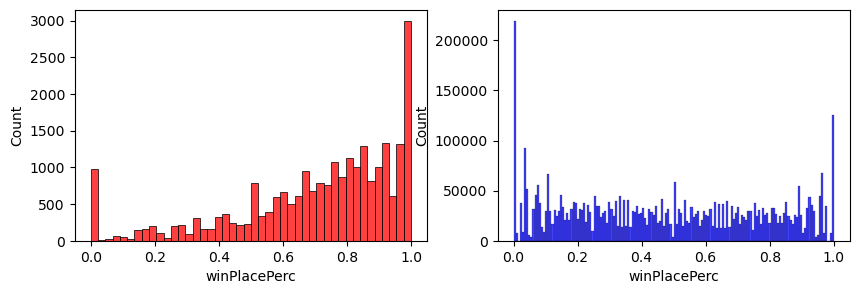

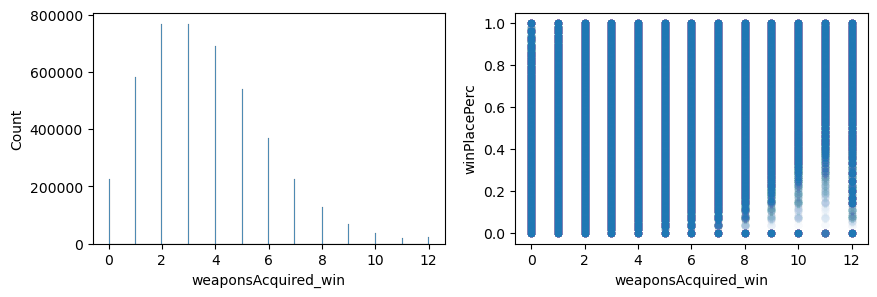

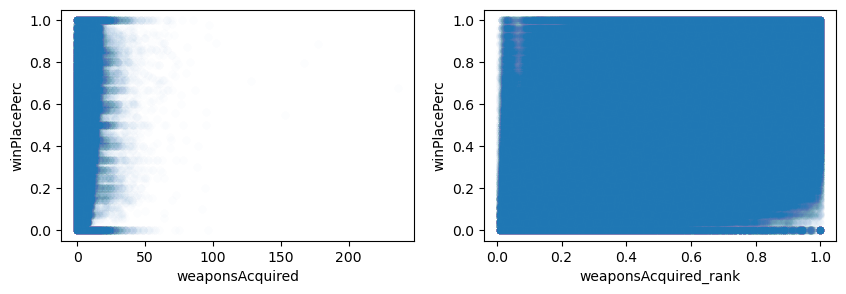

weaponsAcquired
                 weaponsAcquired  winPlacePerc
weaponsAcquired         1.000000      0.583806
winPlacePerc            0.583806      1.000000
weaponsAcquired_win
                     weaponsAcquired_win  winPlacePerc
weaponsAcquired_win             1.000000      0.617544
winPlacePerc                    0.617544      1.000000
weaponsAcquired_rank
                      weaponsAcquired_rank  winPlacePerc
weaponsAcquired_rank              1.000000      0.674382
winPlacePerc                      0.674382      1.000000


In [5]:
for i in range(len(numeric_cols)) :
    col = numeric_cols[i]
    print('#####################################################')
    print('######################   ', col, '   ######################')
    print('#####################################################')
    
    fig, ax = plt.subplots(1, 2, figsize = (10, 3))
    sns.histplot(x = col, data = data, ax = ax[0])
    sns.scatterplot(x = col, y = 'winPlacePerc', data = data, ax = ax[1], alpha = 0.01)
    plt.show()


    top = data[col].quantile(0.995)
    print('quantile 0.99 : ', top)

    tmp1 = data[data[col] >= top]
    tmp2 = data[data[col] < top]
    fig, ax = plt.subplots(1, 2, figsize = (10, 3))
    sns.histplot(x = 'winPlacePerc', data = tmp1, color = 'red', ax = ax[0]) 
    sns.histplot(x = 'winPlacePerc', data = tmp2, color = 'blue', ax = ax[1]) 
    plt.show()
    
    col_win = col+'_win'
    data[col_win] = [x if x < top else top for x in data[col]]

    fig, ax = plt.subplots(1, 2, figsize = (10, 3))
    sns.histplot(x = col_win, data = data, ax = ax[0])
    sns.scatterplot(x = col_win, y = 'winPlacePerc', data = data, ax = ax[1], alpha = 0.01)
    plt.show()
    
    col_rank = col+'_rank'
    data[col_rank] = data.groupby('matchId')[col].rank(pct = True)

    fig, ax = plt.subplots(1, 2, figsize = (10, 3)) 
    sns.scatterplot(x = col, y = 'winPlacePerc', data = data, alpha = 0.01, ax = ax[0])
    sns.scatterplot(x = col_rank, y = 'winPlacePerc', data = data, alpha = 0.01, ax = ax[1])
    plt.show() 
    
    print(col)
    print(data[[col, 'winPlacePerc']].corr())
    print(col_win)
    print(data[[col_win, 'winPlacePerc']].corr())
    print(col_rank)
    print(data[[col_rank, 'winPlacePerc']].corr())